Madison-Taylor Fortich  
9291000361

**1. Data Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**2) Build the Keras Sequential Model**

In [ ]:
ann = tf.keras.models.Sequential()

# a)
ann.add(tf.keras.layers.InputLayer(input_shape=(28, 28, 1)))

# b)
ann.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

# c)
ann.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# d)
ann.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
ann.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

ann.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
ann.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# e)
ann.add(tf.keras.layers.Flatten())

# f)
ann.add(tf.keras.layers.Dense(64, activation='relu'))

# g)
ann.add(tf.keras.layers.Dense(10, activation='softmax'))
ann.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 4)           │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 8)           │             296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,242 (12.66 KB)

 Trainable params: 3,242 (12.66 KB)

 Non-trainable params: 0 (0.00 B)

**3) Training**

In [ ]:
# a)
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# b)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
train_history = ann.fit(x_train,y_train,batch_size=2048,epochs=11, validation_split=0.2,callbacks=[early_stopping])

# c)
evaluate_history = ann.evaluate(x_test, y_test)

print("Training History:", train_history.history)
print("Evaluation Results:", evaluate_history)


Epoch 1/11
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 482ms/step - loss: 0.8040 - sparse_categorical_accuracy: 0.7415 - val_loss: 0.6127 - val_sparse_categorical_accuracy: 0.8027
Epoch 2/11
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 477ms/step - loss: 0.6063 - sparse_categorical_accuracy: 0.8084 - val_loss: 0.4908 - val_sparse_categorical_accuracy: 0.8452
Epoch 3/11
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 476ms/step - loss: 0.4822 - sparse_categorical_accuracy: 0.8489 - val_loss: 0.4150 - val_sparse_categorical_accuracy: 0.8746
Epoch 4/11
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 478ms/step - loss: 0.4115 - sparse_categorical_accuracy: 0.8722 - val_loss: 0.3641 - val_sparse_categorical_accuracy: 0.8916
Epoch 5/11
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 478ms/step - loss: 0.3552 - sparse_categorical_accuracy: 0.8886 - val_loss: 0.3311 - val_sparse_categorical_accuracy: 0.9000
Epoch 6/11
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 486ms/step - loss: 0.3185 - sparse_categorical_accuracy: 0.9027 - val_loss: 0.2946 - val_sparse_categorical_accuracy: 0.911

**4) Evaluation**

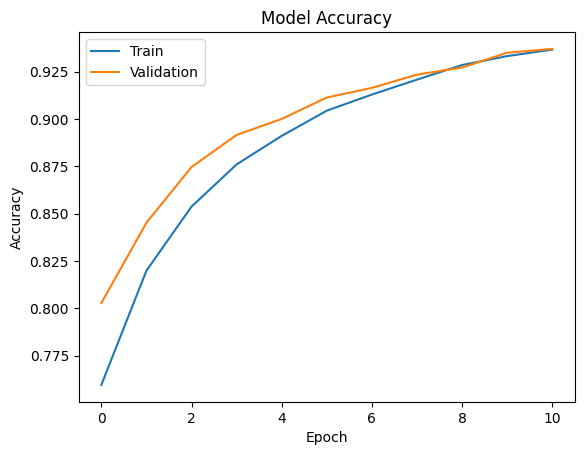

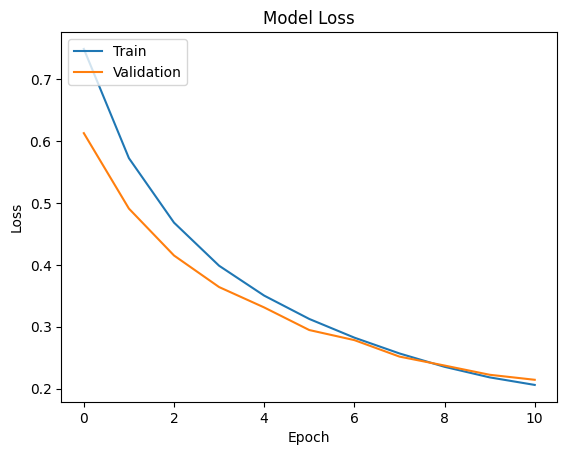

Test Accuracy: 0.940500020980835


In [ ]:
import matplotlib.pyplot as plt

# a)
plt.plot(train_history.history['sparse_categorical_accuracy'])
plt.plot(train_history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# b)
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# c)
print("Test Accuracy:", evaluate_history[1])


**5) Summary**

The ann accuracy steadily improved as shown in the graph. It readched just over 93% by the final epoch. The train loss also consistently decreased as it went from 0.75 to 0.21. Both these trends show that the ann caught the train patterns effectively. The validation accuracy increased from 80 to almost 94%. The validation loss decreased from 0.61 to 0.21, which followed the train set pretty closely. The test accuracy was 94.1%, which aligns nicely with the validation accuracy.